<a href="https://colab.research.google.com/github/pschorey/Valpo_IT533/blob/main/Module_7_kNN_NaiveBayesRev202302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 6: CLASSIFICATION: k Nearest Neighbor and Naive Bayes**
This week, we will step into machine learning with the k Nearest Neighbor and Naive Bayes algorithms. At the end of this week you will be able to:
* Outline the concepts of Supervised Learning
* Explain what classification is
* Describe how k Nearest Neighbor works
* Describe how Naive Bayes works
* Write code to execute both, k Nearest Neighbor and Naive Bayes

##**Supervised Learning**
This week, we are going to take the whole idea of forecasting a step further. With last week's logistic regression, we learned how to build a model that sorts data into 1 of two factors in a target attribute; in other words: A model with binary class outcome. This week, we are going to work with a categorical class attribute and two different machine learning mechanisms: The empirical classifier k Nearest Neighbor and the statistical classifier Naive Bayes.

Both are part of **SUPERVISED LEARNING**. A supervised machine learning algorithm relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data. Imagine a computer is a child, we are its supervisor (e.g. parent, guardian, or teacher), and we want the child (computer) to learn what a book looks like. We will show the child several different pictures, some of which are books and the rest could be pictures of anything (cats, coffee cups, computers, etc).
When we see a book, we shout "book!” When it’s not a pig, we shout “no, not book!” After doing this several times with the child, we show them a picture and ask “book?” and they will correctly (most of the time) say “book!” or “no, not book!” depending on what the picture is. That is supervised learning.

Now, please watch the video below. It's a great introduction to Supervised Learning.

In [2]:
from IPython.display import HTML # This is just for me so I can embed videos
from IPython.display import Image # This is just for me so I can embed images
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/kE5QZ8G_78c" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

##**Classification**
Classification is the problem of identifying which of a set of categories an observation belongs to. For example: Classification helps us assign a given email to the "spam" or "non-spam" class, or a diagnosis to a given patient based on observed characteristics of the patient. 

In machine learning, classification has these steps:
1. Determine what the class attribute in the dataset should be. This will be the attribute you'll predict later on
2. Preprocess the data (remove n/a, transform data types as needed, deal with missing data) and ensure that the dependent attribute is CATEGORICAL
3. Split the data into a training set and a test set
4. Build the model based on the training set
5. Test the model on the test set and compare the calculated class values to the actual class values shown in the test set.
6. Determine the quality of the model

Ready? Let's go.


#**0. Preparation and Setup**
For these explanations, we will need a model with a dependent attribute that is categorical. The typical explanation uses the famous [iris flower dataset](https://github.com/shstreuber/Data-Mining/blob/master/data/iris.csv), which even has [its own wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set). However, we will use the insurance dataset because it allows us to tackle actual real-world problems. Since we will be working with two different types of classification, the first one called k Nearest Neighbor, and the second on called Naive Bayes, we will import all the libraries upfront.

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm

from IPython.display import HTML # This is just for me so I can embed videos
from IPython.display import Image # This is just for me so I can embed images

#Reading in the data as insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/insurance_with_categories.csv")

#Verifying that we can see the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **1. k Nearest Neighbor**
The concept of the k-nearest neighbor classifier is part of our everyday life: Imagine you meet a group of young, stylish, and sportive people. They talk about their friend Ben, who isn't with them. How do you imagine Ben? Young, stylish, and sportive? Bingo! Then you learn that Ben lives in a neighborhood where people have an average income above 200000 dollars a year and drive fancy European cars. Both his neighbors make even more than 300,000 dollars per year! Most likely, you imagine Ben to drive an Audi or a Porsche, as well, right?

The principle behind nearest neighbor classification consists in finding a predefined number, i.e. the 'k' - of training samples closest in (Euclidian) distance to the new sample that we want to classify. The label of the new sample will be defined based on these neighbors. 

Would you like a more in-depth explanation? The video below gives you all the detail you will want to know as you proceed.


In [4]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/4HKqjENq9OU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


##**1.1 Nearest Neighbor Algorithm**
So, in a nutshell, the k Nearest Neighbor Algorithm works like this:
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data: 
  
  3.1 Calculate the distance between the query example and the current example from the data.
  
  3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If classification, return the mode of the K labels

To work with the k Nearest Neighbor algorithm, we use its library from the scikit learn package. We will also learn a new way to build training and test sets (with a process called cross-validation), so we are importing that package, too. Lastly, we will be generating "pretty pictures"--so, matplotlib is going to help us out with that.



In [5]:
# We import all the kNN libraries

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline 

##**1.2 Exploratory Data Analysis**

1. Let's investigate the features (= attributes or dimensions)

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We have 4 numeric attributes and 3 categorical ones. 

2. Let's rearrange the numeric features into a dataframe and use them to predict what region a person comes from.

In [7]:
insurance2 = pd.DataFrame(insurance, columns = ['age', 'bmi', 'children','charges','region'])
insurance2.head()

,age,bmi,children,charges,region
0,19,27.900,0,16884.92400,southwest
1,18,33.770,1,1725.55230,southeast
2,28,33.000,3,4449.46200,southeast
3,33,22.705,0,21984.47061,northwest
4,32,28.880,0,3866.85520,northwest


In [8]:
# Let's check what the levels of region are!
insurance2.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

And now for some fun stuff! Here is a great package that makes EDA much much easier: The [ydata profiling package](https://ydata-profiling.ydata.ai/docs/master/). It's not a standard package, so you'll need to install it with pip, then load it, and finally call it. Its predecessor was called Pandas Profiling, by the way.

**CAUTION**: Profiling packages tend to **change often** and depend on other libraries that may be in different stages of updates (such as SciPy), so while the pip installation below will work, the code to call the package may change, or it may break until the next patch is released. 

Please consult the [documentation link](https://ydata-profiling.ydata.ai/docs/master/) for the latest usage information and also check Stackoverflow for any errors you may see.

In [9]:
# Installing the ydata-profiling package with Jupyter Notebook and unicode support

!pip install -U ydata-profiling[notebook,unicode]

# NOTE: After the installation, you will see a grey button at the end of the installation log that asks you to restart the runtime environment.
# Hit this button and then re-run the code up to here. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=223fd9cf2003e3702b0156e0e4e10808ed41ec436e99a44195750c5a16ad1465
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempti

In [10]:
from ydata_profiling import ProfileReport # Now we load the package
# insurance2.profile_report()
profile = ProfileReport(insurance2, title="Insurance 2 Profiling Report")
profile # And we call the package. This will take a moment. Prepare to be amazed!

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##**1.3 Setting up Training and Test Sets**
To set up our training and test sets, we first split the independent variables (which we are assuming are age, bmi, children, and charges) and the class attribute (region), which contains the labels that we want to assign to the "unknown" data.



In [11]:
x=insurance2.iloc[:,:4] # all parameters
y=insurance2['region'] # class labels 'southwest', 'southeast', 'northwest', 'northeast'

#print(x) # Uncomment this line to verify your parameters/ independent variables/ attributes/ features
#print(y) # Uncomment this line to verify your class labels

Now that we have separated the x attributes (independent variables) and the y attribute (class attribute, dependent variable), we build our training and test sets! 

NOTE that we are not allocating any sizes for the train_test_split below. This will invoke the default, which is a 75% training/ 25% test split.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# So, what training data do we have?
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (1003, 4)
y_train shape: (1003,)


##Your Turn
How many rows and columns do you have in the test data set? Write the command below and run it!

In [13]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (335, 4)
y_test shape: (335,)


##**1.4 Building the Simplest Model with k=1**

Remember that, in kNN classification, the output is class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

We'll try that out first.[link text](https://)

In [14]:
# This is the model with the one nearest neighbor. Note the output shows that the metric is set to minkowski, 
# but the p is set to 2, which means that we are using Euclidian distance (1 = Manhattan distance)

from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

###**1.4.1 Testing the Model**

As you can see, we have built model1, which is the kNN model with just 1 nearest neighbor. Next, we test it.

We use y_pred to store the calculated y values (remember y hat?) that the model gives us. Then we can compare them with the actual y values that we know and see what percentage the model identified correctly.

In [15]:
y_pred = model1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 ['northeast' 'southwest' 'southwest' 'southeast' 'southwest' 'northwest'
 'northeast' 'southwest' 'northwest' 'southeast' 'northeast' 'southwest'
 'southwest' 'southeast' 'southeast' 'southwest' 'northwest' 'southwest'
 'northwest' 'northwest' 'northwest' 'southwest' 'southwest' 'southwest'
 'southwest' 'southeast' 'northwest' 'northeast' 'southeast' 'northwest'
 'southwest' 'southeast' 'southeast' 'northwest' 'northeast' 'northwest'
 'northeast' 'southeast' 'northwest' 'southeast' 'northeast' 'southwest'
 'southwest' 'southeast' 'southeast' 'southeast' 'southeast' 'northwest'
 'northeast' 'southeast' 'northeast' 'northwest' 'southeast' 'southeast'
 'southeast' 'southwest' 'southwest' 'southwest' 'southeast' 'northeast'
 'southwest' 'northwest' 'northwest' 'southwest' 'southwest' 'southeast'
 'northwest' 'southwest' 'northwest' 'southeast' 'northeast' 'southwest'
 'southwest' 'southeast' 'southeast' 'northeast' 'northeast' 'northwest'
 'northeast' 'southeast' 'n

###**1.4.2 Evaluating the model**
Here, we use three critical methods to get an idea of how "good" our model really is.


####1.4.2.1 The Accuracy Score

In [16]:
# Accuracy score
print("Test set score: {:.2f}".format(model1.score(X_test, y_test)))

Test set score: 0.36


Oh boy! That number could be better. Let's see if the other methods indicate the same thing.

####1.4.2.2 Data Inspection Calculated vs. Actual values

In [17]:
# Let's compare the actual y and the predicted y

realvsmodel1 = pd.DataFrame(y_pred,y_test)
realvsmodel1 = pd.DataFrame({'predicted':y_pred,'original':y_test})
realvsmodel1.head()

,predicted,original
578,northeast,southwest
610,southwest,southeast
569,southwest,northwest
1034,southeast,northwest
198,southwest,northwest


Well, that doesn't look too exciting, does it? Let's go to the last and MOST IMPORTANT way of evaluating the quality of our model: **The Confusion Matrix.** 

####1.4.2.3 The Confusion Matrix

A confusion matrix compares the calculated or predicted values for all labels in the class attribute with the actual, true values that we know. In other words, we check which true values were predicted correctly and which were predicted incorrecty. 

A longer, more mathematical, explanation is [here](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

**NOTE**:

The plot_confusion_matrix() function is finally gone from scikit-learn. The deprecated code used to be:

```
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)

```
This code, small and elegant as it was, no longer works. The code below is based on the latest version of scikit-learn as of February 2022.

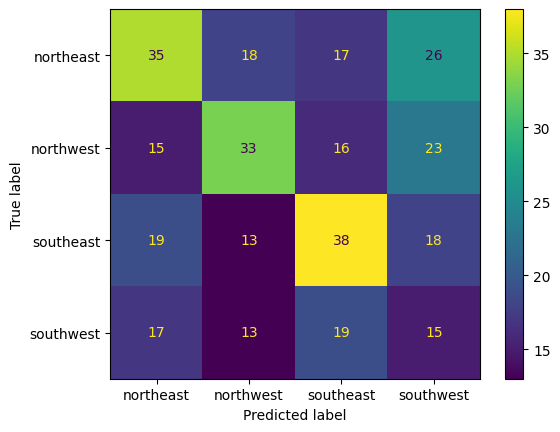

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model1.classes_).plot()

Alrighty. What are we seeing here? 

The true values appear in rows (label on the left side, down), the predicted values appear in columns (label across the top). Here is how to explain **the first row**: 
* All the items should have been in the northeast region because the True Label is 'northeast'. That is clearly not the case; otherwise, we would see 112 in the green box in the upper left and zeros across the rest of the row.
* Of the actual true 'northeast' region, 43 were predicted correctly (yellow); 26 were incorrectly predicted as 'northwest', 19 were incorrectly predicted as 'southeast', and 24 were incorrectly predicted as 'southwest'. So, out of 112 actual 'northeast' rows, only 43 were predicted correctly. 26+19+24 (= 69) were predicted incorrectly.

###1.4.2.4 The Classification Report

The Classification Report gives us even more insights into how well (or, in our case, badly) our model performs. To read it correctly, we first have to define a few terms:
1. **precision** (also called positive predictive value) is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly ((true positives) / (true positives + false positives)). Said another way, “for all instances classified positive, what percent was correct?”
2. **recall** (also known as sensitivity) is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive ((true positives) / (true positives + false negatives)). Said another way, “for all instances that were actually positive, what percent was classified correctly?
3. **f-1 score** is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
3. **support** is the number of actual occurrences of the class in the specified dataset.

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=['southwest', 'southeast', 'northwest', 'northeast']))

              precision    recall  f1-score   support

   southwest       0.18      0.23      0.21        64
   southeast       0.42      0.43      0.43        88
   northwest       0.43      0.38      0.40        87
   northeast       0.41      0.36      0.38        96

    accuracy                           0.36       335
   macro avg       0.36      0.35      0.35       335
weighted avg       0.37      0.36      0.37       335



Look at these values (note that "support" is the number of all true label quantities)--would you accept this quality from, say, a dentist? Or from your car, which (in the case of southwest), engages the brakes in 18% of all cases when you step on the pedal? 

Yeah, I thought so, too. Not good.

## **1.5 Building kNN with 5 nearest neighbors (and a 2/3 to 1/3 train/ test split)**
Given our less-than fabulous results above, let's see if instead of assigning the class label from only 1 nearest neighbor, we can increase the accuracy of our predictions by looking at the class labels for the 5 nearest neighbors!

###1.5.1 Setting up Training and Test Set
Note how here, we use the test_size parameter to split 2/3 of the data into the training set and 1/3 into the test set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (896, 4)
y_train shape: (896,)
X_test shape: (442, 4)
y_test shape: (442,)


###1.5.2 Building the model with k=5

In [21]:
model5 = neighbors.KNeighborsClassifier(n_neighbors=5)

model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

Alright, we've got the model built. Everyone ready for the Confusion Matrix and the Classification Report?

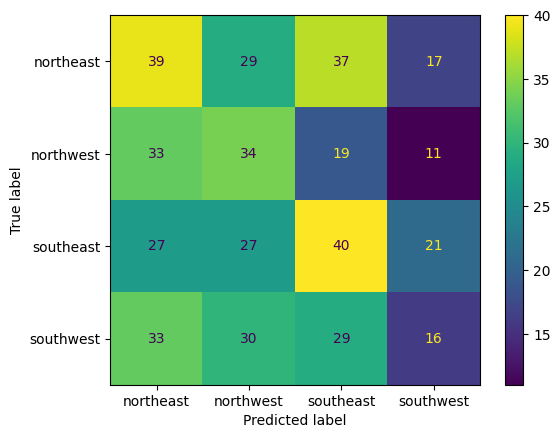

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=model5.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model5.classes_).plot()

In [23]:
print(classification_report(y_test, y_pred, labels=['southwest', 'southeast', 'northwest', 'northeast']))

              precision    recall  f1-score   support

   southwest       0.25      0.15      0.18       108
   southeast       0.32      0.35      0.33       115
   northwest       0.28      0.35      0.31        97
   northeast       0.30      0.32      0.31       122

    accuracy                           0.29       442
   macro avg       0.29      0.29      0.28       442
weighted avg       0.29      0.29      0.29       442



Wait, seriously? Why are we getting a result that is only a little bit different, but we're spending much more processing effort? There's got to be a way to find the optimal number for k!

And there is.

##**1.6 Optimizing k with Cross-Validation**
We could spend entire days re-running the kNN and increasing k by 1 until we've found the best value for k. But that would be 1. boring, 2. too much work, 3. not efficient, given that we could instead just cycle through a list of values until we've found the best one. 

To achieve this in sa most efficient way, we will need to use another trick (aka a preprocessing method) that we haven't encountered yet: **Cross-validation.** Find out [in this detail description](https://machinelearningmastery.com/k-fold-cross-validation/) how cross-validation works. [This graphic](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png) will also help you understand. Or watch this 5-minute video:

In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/fSytzGwwBVw" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

This what we'll do now. Let's go!

First, we build a list of potential k values. Then we create an empty list that will hold cross-validation scores.

In [24]:
# To determine how to pick k, we are first creating a list of potential k values
klist = list(range(1,50,2)) # Our list goes from 1 to 50 in increments of 2

# Then we create an empty list that will hold cross-validation scores
cv_scores = []

Now we can build our cross-validation. We will cycle through our k values from the k-value list and store the accuracy scores in the cv_scores list. To make things easier on us, we will convert the accuracy score into its opposite--the misclassification error. This misclassification error is really the average of all the misclassifications for one run of k.

In [25]:
# Perform 10-fold cross validation for each k value (we have a small dataset, so we can do this)
for k in klist:
    model10 = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model10, x, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
errors = 1- np.array(cv_scores)

NOW we can use the error number to determine the optimal k! To do so, we look at our errors and pick the row with the k value that produced the smallest error. 

To make things easier to understand, we plot the misclassification errors in comparison to k so we can see our results.

The optimal number of neighbors is 1


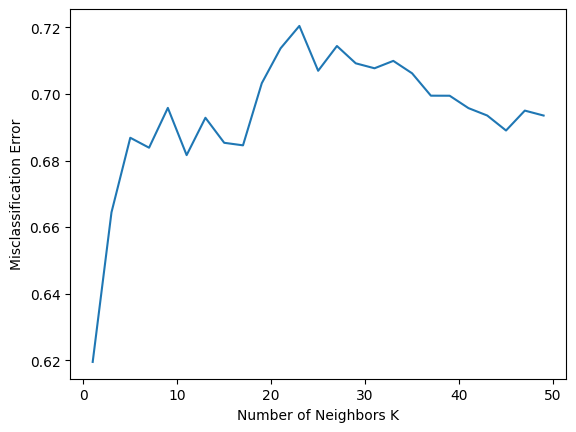

In [26]:
optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

##Your Turn
Re-run this model with k=10 and k=50; for each of these, build and run a confusion matrix and a classification report. What changes? What do your results say about the data?

Use the lines below for your code

Test set score: 0.32
              precision    recall  f1-score   support

   southwest       0.33      0.25      0.29        64
   southeast       0.30      0.33      0.31        88
   northwest       0.32      0.36      0.34        87
   northeast       0.32      0.31      0.32        96

    accuracy                           0.32       335
   macro avg       0.32      0.31      0.31       335
weighted avg       0.32      0.32      0.32       335



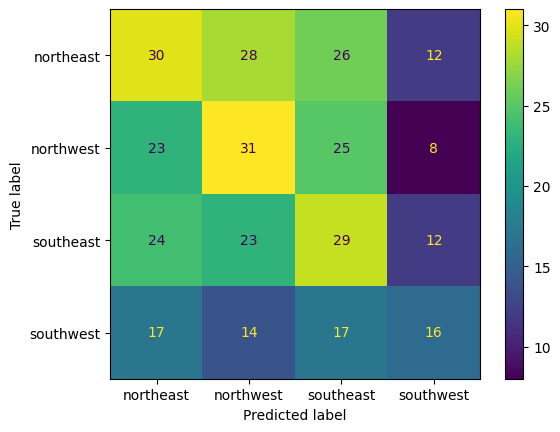

In [27]:
insurance2 = pd.DataFrame(insurance, columns = ['age', 'bmi', 'children','charges','region'])
x=insurance2.iloc[:,:4] # all parameters
y=insurance2['region'] # class labels 'southwest', 'southeast', 'northwest', 'northeast'
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

model10 = neighbors.KNeighborsClassifier(n_neighbors=10)
model10.fit(X_train, y_train)
y_pred = model10.predict(X_test)
print("Test set score: {:.2f}".format(model10.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred, labels=model10.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model10.classes_).plot()
print(cm_display)
print(classification_report(y_test, y_pred, labels=['southwest', 'southeast', 'northwest', 'northeast']))

Test set score: 0.30
              precision    recall  f1-score   support

   southwest       0.20      0.17      0.18        64
   southeast       0.34      0.45      0.39        88
   northwest       0.31      0.30      0.30        87
   northeast       0.30      0.24      0.27        96

    accuracy                           0.30       335
   macro avg       0.29      0.29      0.29       335
weighted avg       0.29      0.30      0.29       335



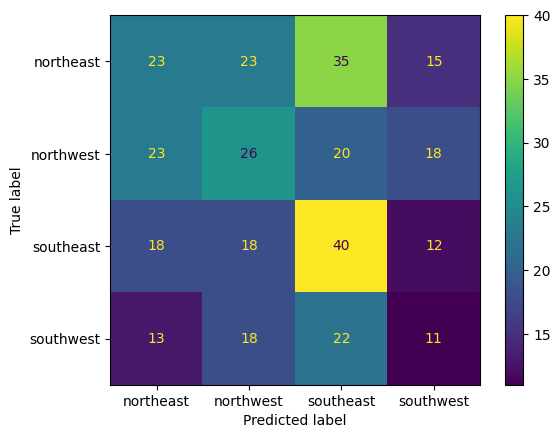

In [28]:
insurance2 = pd.DataFrame(insurance, columns = ['age', 'bmi', 'children','charges','region'])
x=insurance2.iloc[:,:4] # all parameters
y=insurance2['region'] # class labels 'southwest', 'southeast', 'northwest', 'northeast'
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

model50 = neighbors.KNeighborsClassifier(n_neighbors=50)
model50.fit(X_train, y_train)
y_pred = model50.predict(X_test)
print("Test set score: {:.2f}".format(model50.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred, labels=model50.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model50.classes_).plot()
print(cm_display)
print(classification_report(y_test, y_pred, labels=['southwest', 'southeast', 'northwest', 'northeast']))

# **2. Naive Bayes**
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

Here is a [great explanation](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn) of the principle behind the Bayes Theorem. Read the webpage so you understand what we're up to--if you skip it, nothing below will make sense to you.

**WAIT!**
Read that first paragraph again. Then go all the way back to the Exploratory Data Analysis (EDA) section of this file. Look closely at the output of the pandas_profile analysis. Read the first paragraph another time. 


##Your Turn
Given the results from the EDA, should we conduct a Naive Bayes Analysis, at all? What condition does the insurance2 dataset violate? Type your answer below.


Our data shows a high correlation between age and costs. Bayes Analysis assumes variables are independent.

##**2.1 Setting up the Environment**
We will be working with Scikit-Learn again. More specifically, we will be working with the Gaussian Naive Bayes algorithm. Are there other Naive Bayes algorithms? [Absolutely](https://scikit-learn.org/stable/modules/naive_bayes.html). 

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [30]:
#Let's verify that the dataset is still what it needs to be:
insurance2.head()

,age,bmi,children,charges,region
0,19,27.900,0,16884.92400,southwest
1,18,33.770,1,1725.55230,southeast
2,28,33.000,3,4449.46200,southeast
3,33,22.705,0,21984.47061,northwest
4,32,28.880,0,3866.85520,northwest


In [31]:
insurance2.dtypes

age           int64
bmi         float64
children      int64
charges     float64
region       object
dtype: object

##**2.2 Setting up the training and test sets**

In [32]:
ins_train, ins_test = train_test_split(insurance2, test_size = 0.2)
print(ins_train)
print(ins_test)

      age     bmi  children      charges     region
951    51  42.900         2  47462.89400  southeast
768    64  39.700         0  14319.03100  southwest
582    39  45.430         2   6356.27070  southeast
470    27  32.670         0   2497.03830  southeast
200    19  32.110         0   2130.67590  northwest
...   ...     ...       ...          ...        ...
812    54  21.010         2  11013.71190  southeast
272    41  37.050         2   7265.70250  northwest
568    49  31.900         5  11552.90400  southwest
1208   37  25.555         1  20296.86345  northeast
659    57  28.785         4  14394.39815  northeast

[1070 rows x 5 columns]
      age     bmi  children      charges     region
1292   21  23.210         0   1515.34490  southeast
496    31  23.600         2   4931.64700  southwest
1039   19  27.265         2  22493.65964  northwest
1071   63  31.445         0  13974.45555  northeast
548    25  28.595         0   3213.62205  northeast
...   ...     ...       ...          ..

In [33]:
ins_train_np = np.array([ins_train])
ins_test_np = np.array([ins_test])

##**2.3 Building the model with GaussianNB()**
Below, we are fitting the model to the X and y training sets, so that our model can learn what the correct classifications are. 
The first parameter for the fit function is the X-training set, which contains all of the FEATURES in the training dataframe (i.e. the input variables in ins_train). The second parameter for the fit function is the y-training set, which contains the LABELS, i.e. the known outcomes for ins_train. These outcomes are stored in the 'region' column. 

In [34]:
ins_naivebayes = GaussianNB()
ins_naivebayes.fit(ins_train.drop('region',axis=1), ins_train['region']) #param 1 (training data, no answers / labels), param 2 (answers / labels)

GaussianNB()

##**2.4 Testing the model and calculating the accuracy score**
Below, we are using the ins_naivebayes model on the FEATURES in the test data in order to predict their LABELS. This means that we need to remove the old (known) 'region' data in order to use only the features and the model to predict the new 'region' labels.

In [35]:
ins_predictions = ins_naivebayes.predict(ins_test.drop('region',axis=1))
accuracy_score(ins_test['region'], ins_predictions)

0.2947761194029851

In [36]:
ins_predictions

array(['northeast', 'northwest', 'northwest', 'northwest', 'northwest',
       'northwest', 'northwest', 'northeast', 'northwest', 'northeast',
       'northwest', 'southwest', 'northwest', 'northeast', 'southeast',
       'southwest', 'northwest', 'southeast', 'southwest', 'southeast',
       'northwest', 'southeast', 'northwest', 'northwest', 'southwest',
       'northwest', 'northeast', 'southeast', 'southwest', 'southeast',
       'southeast', 'northwest', 'northwest', 'southwest', 'southeast',
       'southeast', 'northwest', 'southwest', 'southwest', 'northwest',
       'northwest', 'southeast', 'southwest', 'southwest', 'southeast',
       'northwest', 'southeast', 'southeast', 'southwest', 'northwest',
       'northwest', 'northeast', 'southeast', 'southeast', 'northwest',
       'southeast', 'southeast', 'southwest', 'northeast', 'southwest',
       'northwest', 'northwest', 'southeast', 'southeast', 'northwest',
       'northwest', 'southwest', 'southwest', 'southeast', 'sout

##**2.5 Comparing the predicted and the original values**

In [37]:
realvsmodel2 = pd.DataFrame(ins_predictions,ins_test)
realvsmodel2 = pd.DataFrame({'predicted':ins_predictions,'original':ins_test['region']})
realvsmodel2.head()

,predicted,original
1292,northeast,southeast
496,northwest,southwest
1039,northwest,northwest
1071,northwest,northeast
548,northwest,northeast


##Your Turn
Plot a confusion matrix. For your code, refer to section 1.4.2.3 above:

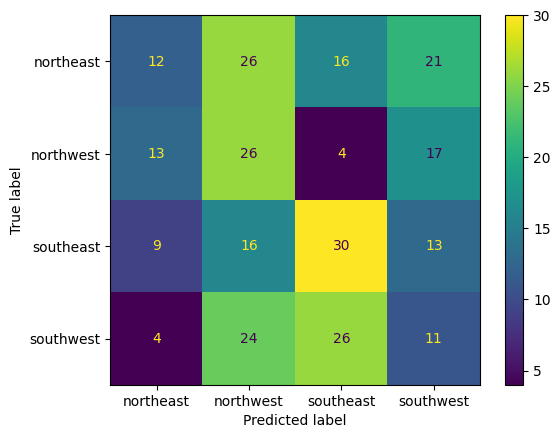

In [38]:
y_test = ins_test['region']
y_pred = ins_predictions
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model1.classes_).plot()

## Your Turn
Build a classification report. For your code, refer to section 1.4.2.4 above:

In [39]:
print(classification_report(y_test, y_pred, labels=['southwest', 'southeast', 'northwest', 'northeast']))

              precision    recall  f1-score   support

   southwest       0.18      0.17      0.17        65
   southeast       0.39      0.44      0.42        68
   northwest       0.28      0.43      0.34        60
   northeast       0.32      0.16      0.21        75

    accuracy                           0.29       268
   macro avg       0.29      0.30      0.29       268
weighted avg       0.29      0.29      0.28       268



##Your Turn
Compare the results from the confusion matrix and the classification report for k Nearest Neighbor and Naive Bayes. Which model produces better results? Write your answer into the text field below.

Both the k Nearest Neighbor and Naive Bayes produced a macro average of 29% accuracy. However, the f1-score for the k Nearest Neighbor is about 6% higher, which indicates that k Nearest Neighbor was a slightly better tool for predicting regions in our data set.

##Your Turn
How valid are the results for the Naive Bayes classification really? Review the assumptions for work with Naive Bayes, especially regarding dependency among independent attribtues, and then look again at the results of the pandas_profiling output above. Write your answer into the text field below.



In my opinion Naive Bayes was not a good tool for this data set. Given four regions with approximitly equal distributions we should have at least a 25% accuracy rate. This model is sitting at 29%, so not very impressive.

##Your Turn
So ... given the data that we have, can we reliably predict the region someone lives in based on their age, bmi, number of children, and the $ amount of their insurance claims? Explain in the field below.

None of our tools thus far were very good at making highly accurate region preditions.